- import package `numpy` and `matplotlib`.
- here using Runge-Kutta 4(5) to solve the ODE 

In [77]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["text.usetex"] = True
def RK45(F, Y0, t):
    Y,Z = np.zeros((len(t),len(Y0))),np.zeros((len(t),len(Y0)))
    h = t[1]-t[0]
    error = np.zeros((len(t),len(Y0)))
    Y[0], Z[0] = Y0, Y0
    b1 ,b2 ,b3 ,b4, b5 = 13/96, 0, 25/48, 25/96, 1/12
    B1 ,B2 ,B3 ,B4, B5 = 23/192, 0, 55/96, 35/192, 1/8
    c1, c2, c3, c4, c5 = 0, 1/5, 2/5, 4/5, 1
    a21                 = 1/5  
    a31, a32            = 0, 2/5
    a41, a42, a43       = 6/5, -12/5, 2
    a51, a52, a53, a54  = -17/8, 5, -5/2, 5/8
    for i in range(0,len(t)-1):
        f1 = F( t[i]+c1*h , Y[i])
        f2 = F( t[i]+c2*h , Y[i]+ h*a21*f1 )
        f3 = F( t[i]+c3*h , Y[i]+ h*a31*f1+ h*a32*f2)
        f4 = F( t[i]+c4*h , Y[i]+ h*a41*f1+ h*a42*f2+ h*a43*f3)
        f5 = F( t[i]+c5*h , Y[i]+ h*a51*f1+ h*a52*f2+ h*a53*f3+ h*a54*f4)
        Y[i+1] = Y[i] + h*( b1*f1 + b2*f2 + b3*f3 + b4*f4 + b5*f5 )
        Z[i+1] = Z[i] + h*( b1*f1 + b2*f2 + b3*f3 + b4*f4 )
        error[i+1] = Y[i] - Z[i]
    return Y#,error

# Gravitational Lensing
The light-like geodesic in Schwarzschild, we have
$$\frac{d^2u}{d\phi} + u = \frac{3GM}{c^2}u^2,$$
where $\displaystyle u=\frac{1}{r}$ and $u=u\left(\phi\right)$.

Since we know $\displaystyle\frac{3GM}{c^2}$ is [photon sphere](https://en.wikipedia.org/wiki/Photon_sphere), we denote
$$
R_{s} = \frac{2GM}{c^2},
$$

Denote first and second derivative to be
$$
u' = \frac{du}{d\phi},\quad u'' = \frac{d^2u}{d\phi^2},
$$
then define a general vector
$$
\vec{U} = \begin{pmatrix}u\\u'\end{pmatrix}.
$$
The ODE becomes
$$
\frac{d}{d\phi}\vec{U} = \begin{pmatrix}u'\\u''\end{pmatrix} = \begin{pmatrix}u'\\1.5R_{s}u^2-u\end{pmatrix}.
$$
Let right hand side vector to be a vector function
$$
\vec{F}\left(\phi,\vec{U}\right) = \begin{pmatrix}u'\\1.5R_{s}u^2-u\end{pmatrix}
$$

In [153]:
Rp = 0.5
def F(phi,U):
    F0 = U[1]
    F1 = 1.5*Rp*U[0]**2 - U[0]
    return np.array([F0,F1])

with the intial vector 
$$
\vec{U}_0 = \begin{pmatrix}0\\1\end{pmatrix}
$$

In [154]:
dphi     = 0.01
phi_init = 0
phi_stop = np.pi
phi      = np.arange(phi_init, phi_stop, dphi)
U0     = np.array([0,1])

U = RK45(F, U0, phi)
u = U[:,0]
u[u==0] = 1e-16
r = 1/u

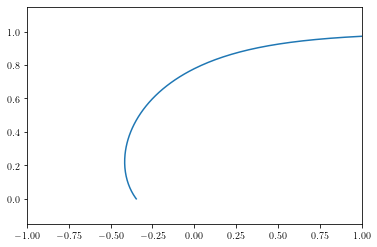

In [155]:
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x,y)
plt.axis('equal')
plt.xlim(-1,1)
plt.show()

## define a ploter for many $R_{p}$

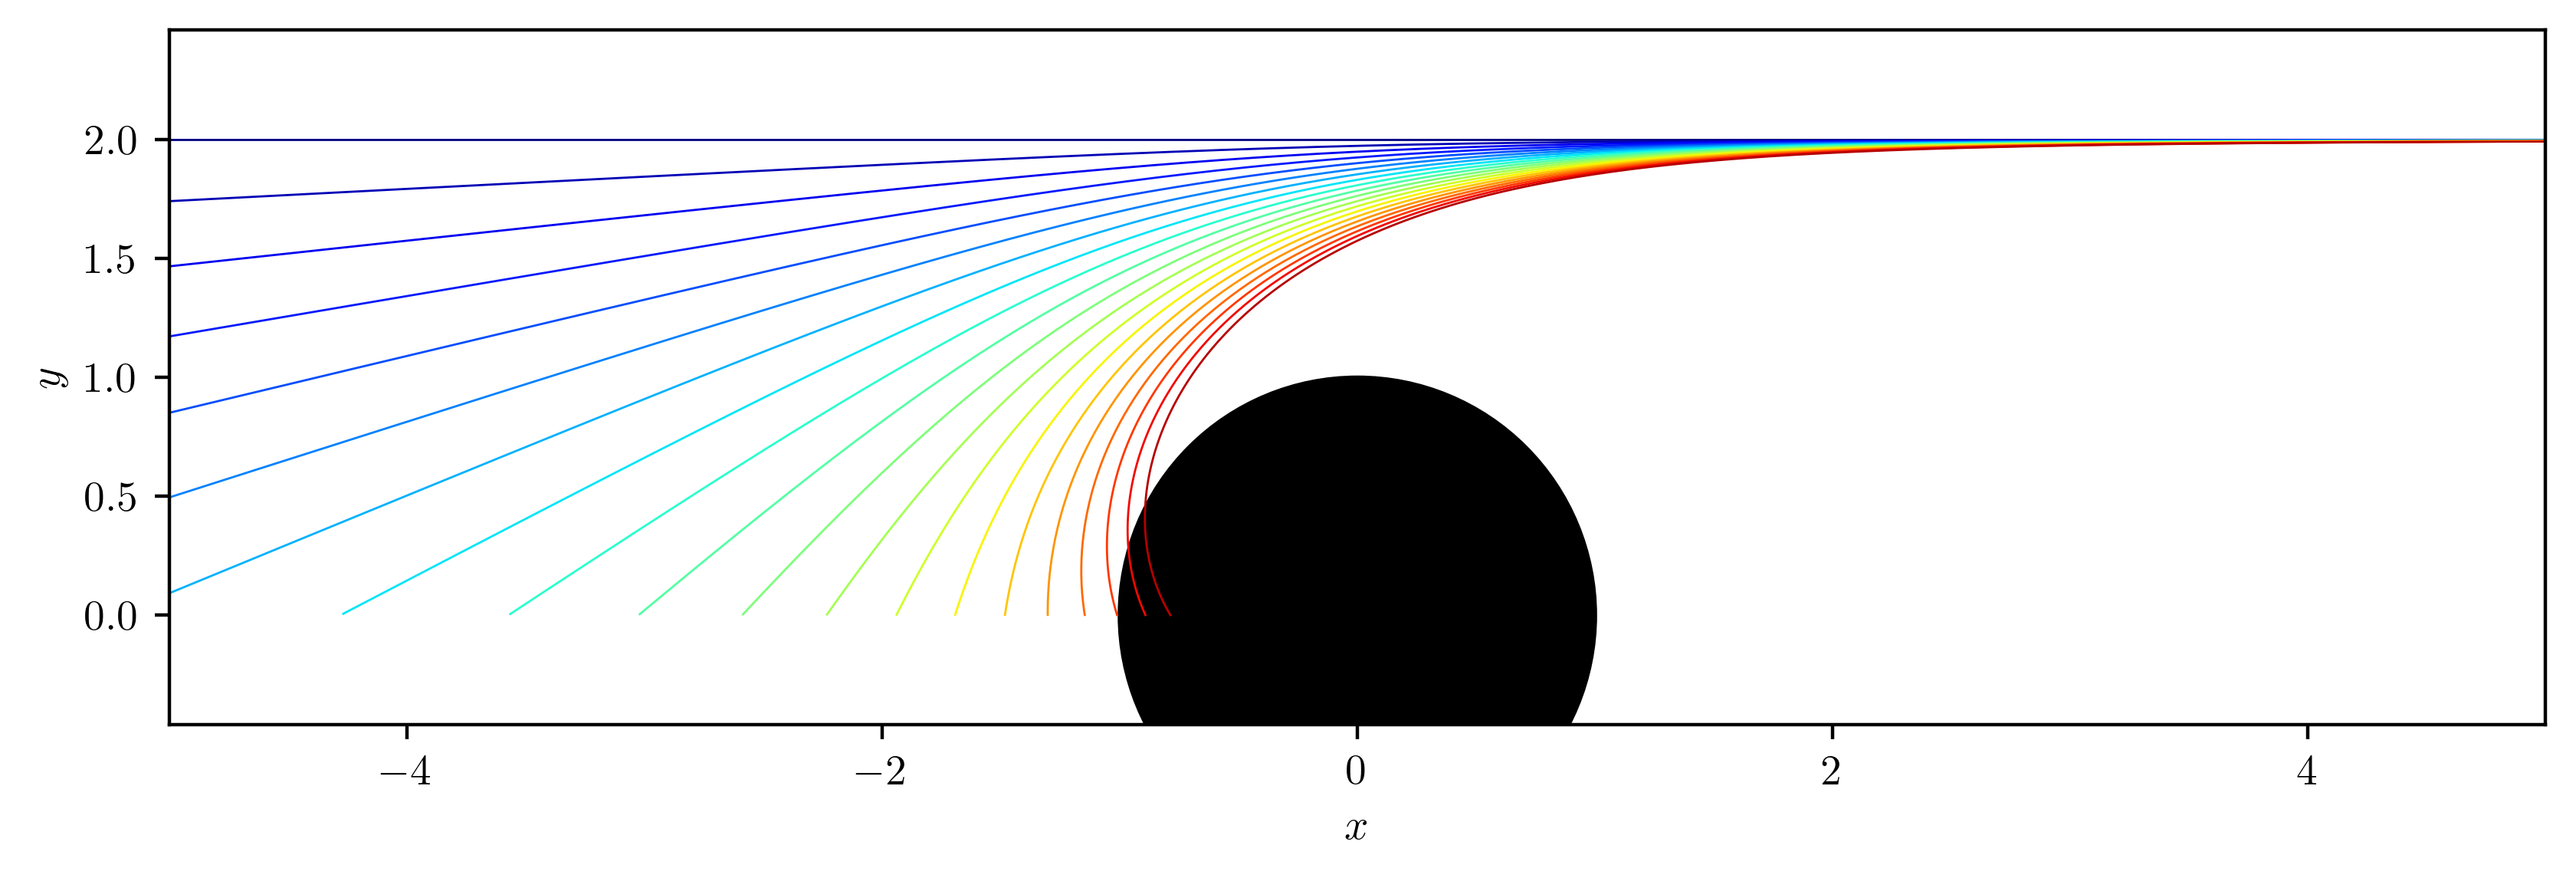

In [181]:
Rs = 1
def ODE(scale):
    def F(phi,U):
        F0 = U[1]
        F1 = scale*1.5*Rs*U[0]**2 - U[0]
        return np.array([F0,F1])
    dphi     = 0.01
    phi_init = 0
    phi_stop = np.pi
    phi      = np.arange(phi_init, phi_stop, dphi)
    U0     = np.array([0,0.5])

    U = RK45(F, U0, phi)
    u = U[:,0]
    u[u==0] = 1e-16
    r = 1/u
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    return x,y

fig, ax = plt.subplots(1,1,dpi=400,figsize=(10,3))
scales = np.arange(0, 1, 0.05)
colors = plt.cm.jet(np.arange(0, 1, 1/len(scales)))
for scale, color in zip(scales,colors):
    x,y = ODE(scale)
    plt.plot(x, y, color=color, linewidth=0.5)

BH = plt.Circle((0,0), Rs, color='black')
ax.add_artist(BH) 
ax.axis('equal')
ax.set_xlim(-5*Rs,5*Rs)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.show()